In [1]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))

2024-05-02 13:42:51.170057: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-02 13:42:51.431502: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Num GPUs: 0


2024-05-02 13:42:53.020523: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: UNKNOWN ERROR (100)


In [2]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import os
%matplotlib inline
import tensorflow

import keras
from keras import layers
from keras import ops

print (tensorflow.__version__)

2.16.1


In [3]:
import glob
files = glob.glob('DATASET_ORIGINAL/BULK CARRIER/*.jpg') #REPLACE FOR THE INTENDED CLASS
len(files)

505

In [4]:
images = []
for file in tqdm_notebook(files):
    celeb_img = cv2.imread(file)
    celeb_img = cv2.cvtColor(celeb_img, cv2.COLOR_BGR2RGB)
    celeb_img = cv2.resize(celeb_img, (64, 64))
    images.append((celeb_img-127.5)/127.5)

images = np.array(images)
print (images.shape)

/tmp/ipykernel_122957/1254671714.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for file in tqdm_notebook(files):


  0%|          | 0/505 [00:00<?, ?it/s]

(505, 64, 64, 3)


In [5]:
random_input = keras.Input(shape = (128,))

x = layers.Dense(8 * 8 * 128)(random_input)
#x = layers.Activation('relu')(x)
#x = layers.BatchNormalization(momentum=0.8)(x)

x = layers.Reshape((8, 8, 128))(x)

x = layers.Conv2DTranspose(filters=128, kernel_size=(4,4), strides=(2,2), padding='same')(x)
x = layers.Activation('relu')(x)
#x = layers.BatchNormalization(momentum=0.8)(x)

x = layers.Conv2DTranspose(filters=256, kernel_size=(4,4), strides=(2,2), padding='same')(x)
x = layers.Activation('relu')(x)
#x = layers.BatchNormalization(momentum=0.8)(x)

x = layers.Conv2DTranspose(filters=512, kernel_size=(4,4), strides=(2,2), padding='same')(x)
x = layers.Activation('relu')(x)
#x = layers.BatchNormalization(momentum=0.8)(x)

x = layers.Conv2D(filters=3, kernel_size=(5,5), padding='same')(x)
generated_image = layers.Activation('sigmoid')(x)

generator_network = keras.models.Model(inputs=random_input, outputs=generated_image)
generator_network.summary()

2024-04-09 15:06:34.059377: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-09 15:06:34.059417: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-09 15:06:34.059428: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-09 15:06:34.200797: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-09 15:06:34.200834: I external/local_xla/xla/stream_executor

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8192)           │     1,056,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 16, 16, 128)    │       262,272 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 32, 32, 256)    │       524,544 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 64, 64, 512)    │     2,097,664 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64, 64, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 3)      │        38,403 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64, 64, 3)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,979,651 (15.18 MB)

 Trainable params: 3,979,651 (15.18 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
image_input = tensorflow.keras.layers.Input(shape=(64, 64, 3))

x = tensorflow.keras.layers.Conv2D(filters=64, kernel_size=(4,4), strides=2, padding='same')(image_input)
x = tensorflow.keras.layers.LeakyReLU(negative_slope=0.2)(x)

x = tensorflow.keras.layers.Conv2D(filters=128, kernel_size=(4,4), strides=2, padding='same')(x)
x = tensorflow.keras.layers.LeakyReLU(negative_slope=0.2)(x)
#x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)

x = tensorflow.keras.layers.Conv2D(filters=128, kernel_size=(4,4), strides=2, padding='same')(x)
x = tensorflow.keras.layers.LeakyReLU(negative_slope=0.2)(x)
#x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)


x = tensorflow.keras.layers.Flatten()(x)

x = tensorflow.keras.layers.Dense(1)(x)
real_vs_fake_output = tensorflow.keras.layers.Activation('sigmoid')(x)

discriminator_network = tensorflow.keras.models.Model(inputs=image_input, outputs=real_vs_fake_output)
discriminator_network.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         8,193 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 404,801 (1.54 MB)

 Trainable params: 404,801 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
generator_network.compile(
    loss='binary_crossentropy', optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5), metrics=['accuracy'])
discriminator_network.compile(
    loss='binary_crossentropy', optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5), metrics=['accuracy'])

In [8]:
discriminator_network.trainable=False

g_output = generator_network(random_input)
d_output = discriminator_network(g_output)

dcgan_model = tensorflow.keras.models.Model(random_input, d_output)
dcgan_model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional_1 (Functional)       │ (None, 64, 64, 3)      │     3,979,651 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional_3 (Functional)       │ (None, 1)              │       404,801 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,384,452 (16.73 MB)

 Trainable params: 3,979,651 (15.18 MB)

 Non-trainable params: 404,801 (1.54 MB)

In [9]:
dcgan_model.compile(loss='binary_crossentropy', optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5))

In [10]:
def get_random_noise(batch_size, noise_size):
    random_values = np.random.randn(batch_size*noise_size)
    random_noise_batch = np.reshape(random_values, (batch_size, noise_size))
    return random_noise_batch

def get_fake_samples(generator_network, batch_size, noise_size):
    random_noise_batch = get_random_noise(batch_size, noise_size)
    fake_samples = generator_network.predict_on_batch(random_noise_batch)
    return fake_samples

def get_real_samples(batch_size):
    random_files = np.random.choice(files, size=batch_size)
    images = []
    for file in random_files:
        celeb_img = cv2.imread(file)
        celeb_img = cv2.cvtColor(celeb_img, cv2.COLOR_BGR2RGB)
        celeb_img = cv2.resize(celeb_img, (64, 64))
        images.append((celeb_img-127.5)/127.5)
    real_images = np.array(images)
    return real_images

def show_generator_results(generator_network):
    for k in range(9):
        plt.figure(figsize=(11, 11))
        fake_samples = get_fake_samples(generator_network, 9, noise_size)
        fake_samples = (fake_samples+1.0)/2.0
        for j in range(4):
            plt.subplot(990 + 1 + j)
            plt.imshow(fake_samples[j])
            #fake_samples[j] = (fake_samples[j] * 127.5)
            #cv2.imwrite('ImagemNova%04i.jpg' %i, fake_samples[j])
            plt.axis('off')
            #plt.title('ImagemNova%i.jpg' %i)
        plt.show()
    return

I0000 00:00:1712675194.820281  123108 service.cc:145] XLA service 0x7f8e08004a00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1712675194.820311  123108 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2024-04-09 15:06:34.839341: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-09 15:06:34.884892: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8906
I0000 00:00:1712675195.679455  123108 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


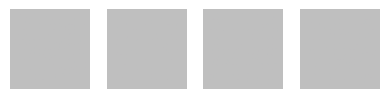

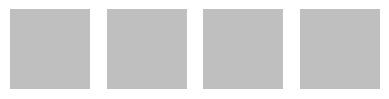

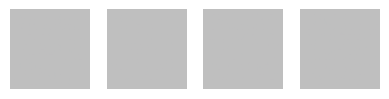

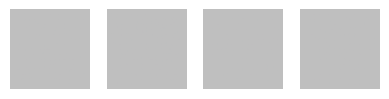

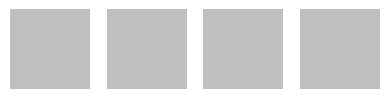

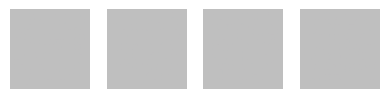

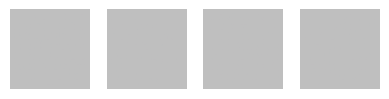

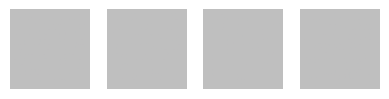

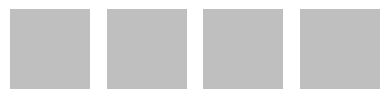

INFO:tensorflow:Assets written to: BULK CARRIER_FAKE/GERADOR0/assets


INFO:tensorflow:Assets written to: BULK CARRIER_FAKE/GERADOR0/assets


Epoch:0, Step:0, D-Loss:0.693, D-Acc:50.000, G-Loss:0.762


Epoch:0, Step:50, D-Loss:0.273, D-Acc:97.843, G-Loss:1.270
Epoch:0, Step:100, D-Loss:0.146, D-Acc:98.861, G-Loss:3.072
Epoch:0, Step:150, D-Loss:0.162, D-Acc:98.146, G-Loss:3.717
Epoch:0, Step:200, D-Loss:0.129, D-Acc:98.433, G-Loss:4.049
Epoch:0, Step:250, D-Loss:0.105, D-Acc:98.705, G-Loss:4.402


In [ ]:
epochs = 800
batch_size = 20
steps = 400
noise_size = 128

save_loss_d = np.zeros(epochs)
save_acc_d  = np.zeros(epochs)
save_loss_g = np.zeros(epochs)

for i in range(0, epochs):
    if (i%1 == 0):
        show_generator_results(generator_network)
        tensorflow.saved_model.save(generator_network,'BULK CARRIER_FAKE/GERADOR'+ str(i))  #REPLACE FOR THE INTENDED CLASS
    for j in range(steps):
        fake_samples = get_fake_samples(generator_network, batch_size//2, noise_size)
        real_samples = get_real_samples(batch_size=batch_size//2)

        fake_y = np.zeros((batch_size//2, 1))
        real_y = np.ones((batch_size//2, 1))

        input_batch = np.vstack((fake_samples, real_samples))
        output_labels = np.vstack((fake_y, real_y))
        # Updating Discriminator weights
        discriminator_network.trainable=True
        loss_d = discriminator_network.train_on_batch(input_batch, output_labels)

        gan_input = get_random_noise(batch_size, noise_size)

        # Make the Discriminator belive that these are real samples and calculate loss to train the generator
        gan_output = np.ones((batch_size))

        # Updating Generator weights
        discriminator_network.trainable=False
        loss_g = dcgan_model.train_on_batch(gan_input, gan_output)

        if j%50 == 0:
            print ("Epoch:%.0f, Step:%.0f, D-Loss:%.3f, D-Acc:%.3f, G-Loss:%.3f"%(i,j,loss_d[0],loss_d[1]*100,loss_g))
    save_loss_d[i] = loss_d[0]
    save_loss_g[i] = loss_g
    save_acc_d [i] = loss_d[1]

In [ ]:
menor_valor = 99
for i in range(800):
    if (i%1 == 0):
        if (save_loss_g[i]<menor_valor && save_loss_g[i] != 0):
            menor_valor = save_loss_g[i]
            epoch_m = i
print('Menor perda:          ',menor_valor)
print('Época da menor perda: ',epoch_m)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(3,3))
plt.plot(save_loss_g[:800],color='r')
plt.title('Gerador')
plt.ylabel('Erro')
plt.xlabel('Epoch')
plt.grid()
plt.show()

In [ ]:
#Generating Unlimited samples

generator_network = tensorflow.keras.models.load_model('BULK CARRIER_FAKE/GERADORX')  #REPLACE FOR THE INTENDED CLASS
num_img = 1
latent_dim = 128

random_latent_vectors = keras.random.normal(shape=(num_img, latent_dim), seed=keras.random.SeedGenerator(42))
generated_images = generator(random_latent_vectors)
generated_images *= 255
generated_images.numpy()
for i in range(num_img):
    img = keras.utils.array_to_img(generated_images[i])
    img.save("BULK_CARRIER_%d.png" % (i))